# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages dop Python.

KMeans(n_clusters=4, random_state=0)


Text(0, 0.5, 'time')

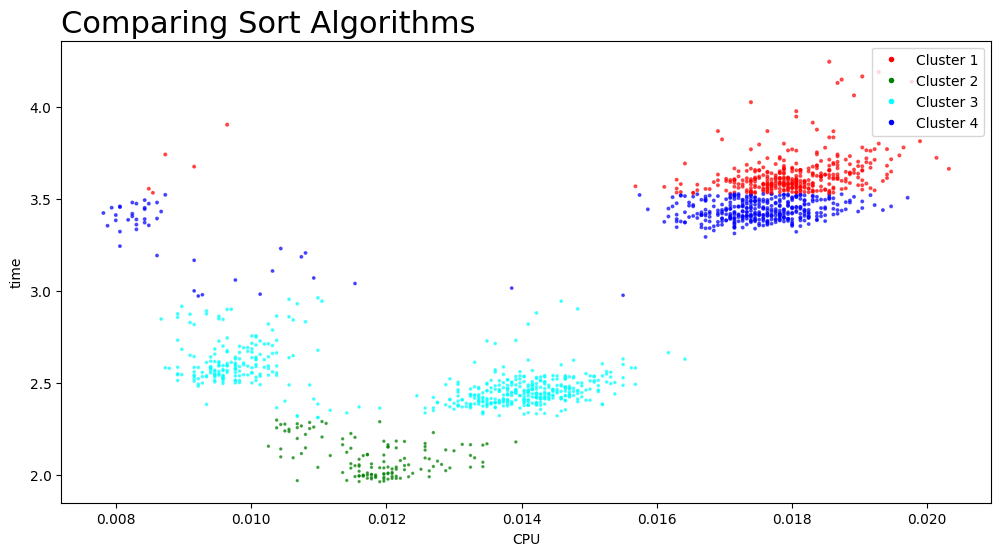

In [6]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'C2.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','time'])
df = df.drop(columns=['test'])
# preprocessa categoricos com one hot encoding
#df = pd.get_dummies(df, columns=["test"])  



#k means
kmeans = KMeans(n_clusters=4, random_state=0,n_init='auto')
#get centroids
df['cluster'] = kmeans.fit_predict(df)
print(kmeans)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})

#define and map colors
#colors = ['#DF2020', '#81DF20', '#2095DF']
colors=['red','green','cyan','blue']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.figure(figsize=(12,6))
plt.scatter(df.CPU, df.time, c=df.c, s=df.time, alpha = 0.6)

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]

# plot legend
plt.legend(handles=legend_elements, loc='upper right')

# title and labels
plt.title('Comparing Sort Algorithms', loc='left', fontsize=22)
plt.xlabel('CPU')
plt.ylabel('time')

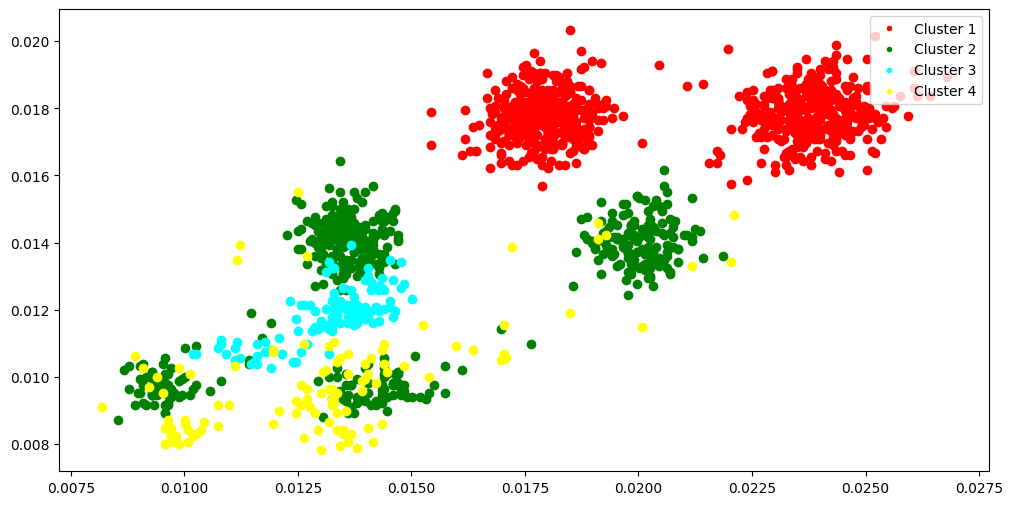

  Cluster    Distribuição de Probabilidades
  c=3  [7.56716189e-06 0.00000000e+00 4.40176138e-34 9.99992433e-01]
  c=3  [3.27850600e-08 0.00000000e+00 2.02206000e-33 9.99999967e-01]
  c=1  [1.19985891e-032 1.00000000e+000 6.10499051e-102 2.04274822e-017]
  c=3  [2.67187570e-14 0.00000000e+00 9.43516607e-48 1.00000000e+00]
  c=3  [9.01462710e-08 0.00000000e+00 1.93893463e-41 9.99999910e-01]
  c=2  [4.60292448e-07 0.00000000e+00 9.99999540e-01 2.16789345e-46]
  c=2  [2.13908063e-09 0.00000000e+00 9.99999998e-01 5.90037937e-53]
  c=0  [9.99999997e-01 0.00000000e+00 7.45861801e-13 3.41426990e-09]
  c=0  [9.95480122e-01 0.00000000e+00 4.51987770e-03 6.11663889e-25]
  c=2  [2.51647639e-03 0.00000000e+00 9.97483524e-01 3.44803841e-34]
  c=2  [1.54068228e-09 0.00000000e+00 9.99999998e-01 9.81213994e-54]
  c=0  [9.99999943e-01 0.00000000e+00 5.71160864e-08 1.35954113e-19]
  c=2  [9.63894244e-05 0.00000000e+00 9.99903611e-01 2.47081653e-45]
  c=2  [9.26714495e-07 0.00000000e+00 9.99999073e-01 2.

In [7]:
# Implementação de EM Clustering
# Usa procedimento de Expectation Maximization via Gaussion Mixture Models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D




# dataset
file_name = 'C2.csv'
data = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','time'])
data = data.drop(columns=['test'])
# preprocessa categoricos com one hot encoding
#data = pd.get_dummies(data, columns=["test"])  

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
#gmm.fit(data)

#predictions from gmm
labels = gmm.fit_predict(data)
frame = pd.DataFrame(data)

frame['cluster'] = labels
frame.columns = ['PKG','CPU','time','cluster']


colors=['red','green','cyan','yellow']
plt.figure(figsize=(12,6))
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PKG"],data["CPU"],c=colors[k])

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')


plt.show()

# calcular probs dos casos por cluster
X = data[59:76]
X.columns = ['PKG','CPU','time','cluster']
X = X.drop(columns=['cluster'])


#X.columns = ['PKG','CPU','time','cluster']
#X = np.delete(X,3,1) # remove a coluna de 'cluster'

# imprime elementos, cluster e distribuição de probs
print("  Cluster    Distribuição de Probabilidades")
a = gmm.fit_predict(X)
b = gmm.predict_proba(X)
i = 0
for x in a:
    print("  c="+str(x)+"  "+str(b[i]))
    i += 1




DBSCAN(eps=1, min_samples=3)
Estimated number of clusters: 4
Estimated number of noise points: 0


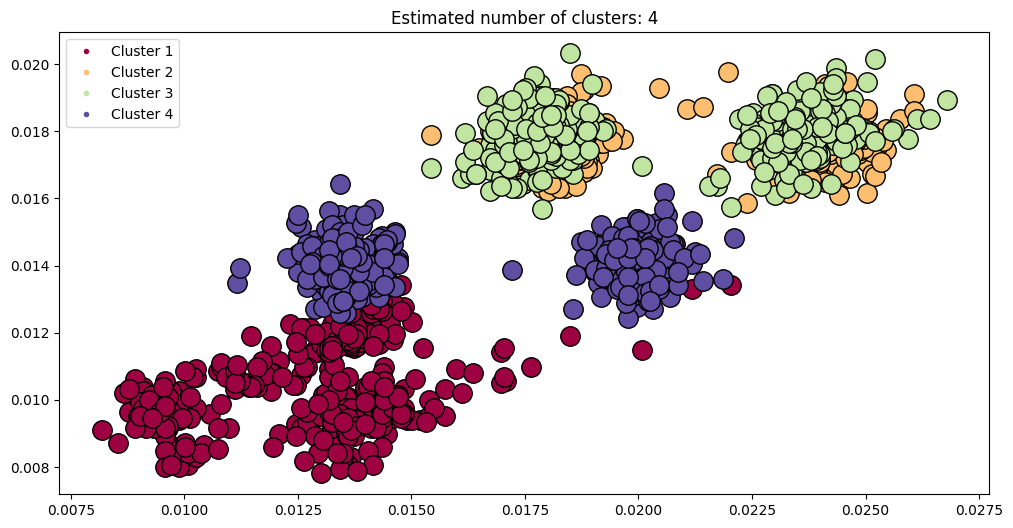

In [8]:
# Exemplo de uso do DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np


file_name = 'C2.csv'
data = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','time'])
#data = data.drop(columns=['test'])
data = pd.get_dummies(data, columns=["test"])  
data.columns = ['t1','t2','t3','t4','PKG','CPU','time']
"""
file_name = 'sample_data/california_housing_train.csv'
data = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"])
data = data.drop(columns=["total_rooms","total_bedrooms","population"])
data.columns = ["longitude","latitude","housing_median_age","households","median_income","median_house_value"]
"""

clust = DBSCAN(eps=1, min_samples=3).fit(data)
labels = clust.labels_
#print(clust.fit_predict(X))

print(clust)


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


X = np.array(data)
#X = np.delete(X,3,1) # remove a coluna de 'cluster'

plt.figure(figsize=(12,6))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clust.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

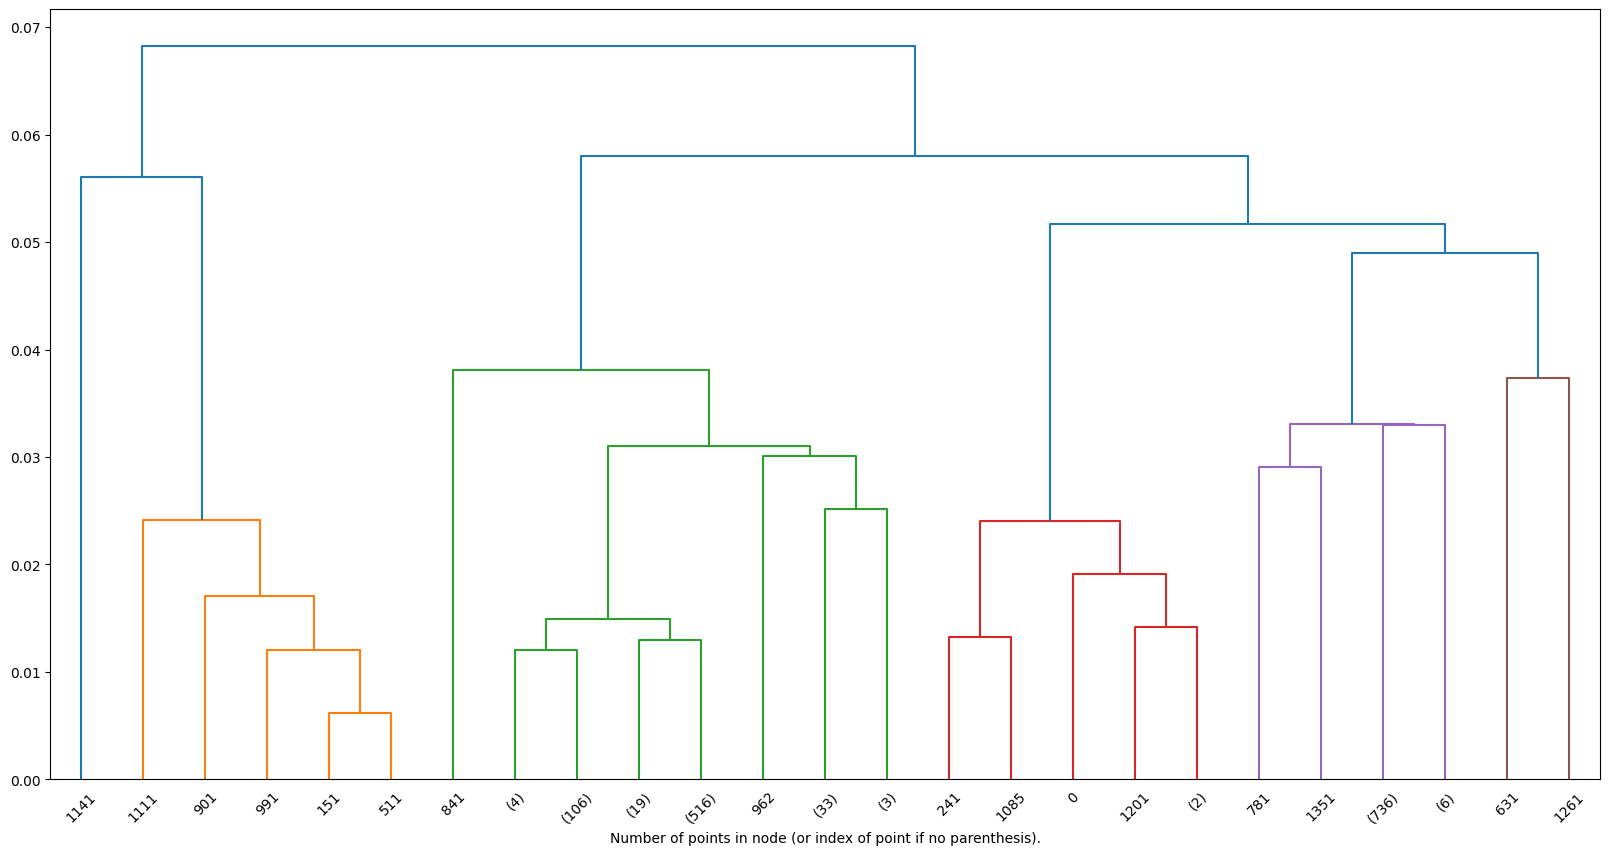

In [9]:
# Hierachical Clustering
import numpy as py
from scipy.cluster.hierarchy import dendrogram, linkage

a = pd.read_csv('C2.csv', header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','time'])
b = a.drop(columns='test')
#print("num regs="+str(a.size/a.columns.size))

link = linkage(b, method='single', metric='euclidean')
plt.figure(figsize=(20,10))
dendrogram(link,truncate_mode="level",p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

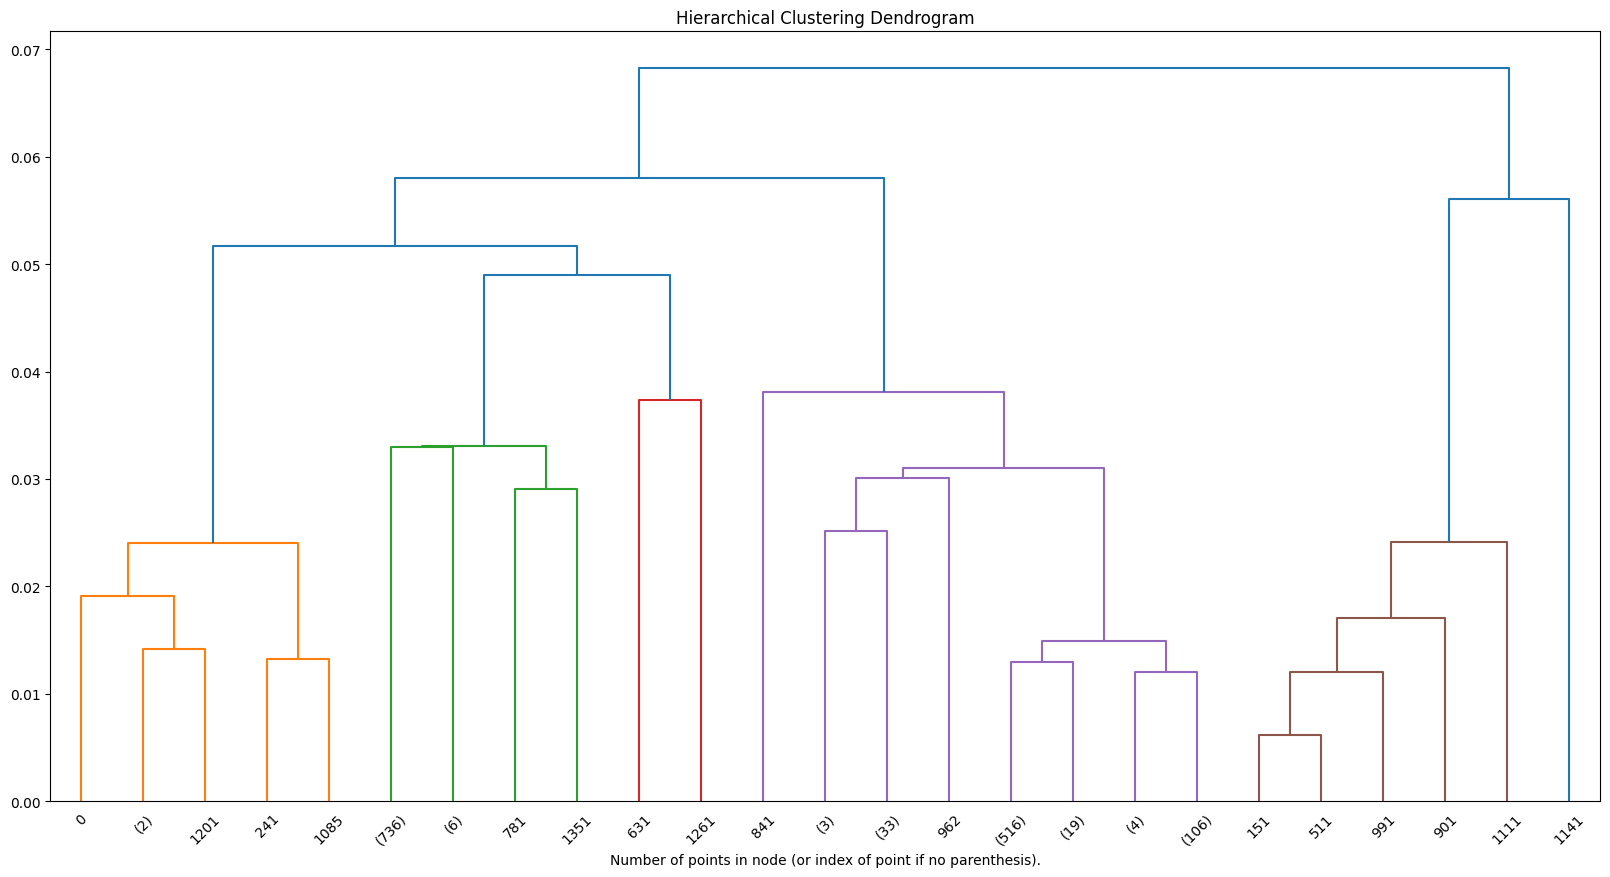

In [10]:
# Agglomerative Clustering (bottom-up construction)

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# progr principal
a = pd.read_csv('C2.csv', header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','time'])
a = a.drop(columns='test')
clustering = AgglomerativeClustering().fit(a)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single',metric='euclidean')

model = model.fit(a)
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()